In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-dataset-of-india/House Price India.csv


In [2]:
vg_df = pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')

In [3]:
print('This dataset has ' + str(vg_df.shape[0]) + ' rows, and ' + str(vg_df.shape[1]) + ' columns')

This dataset has 14620 rows, and 23 columns


In [4]:
vg_df.head(7)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000


In [5]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
import seaborn as sns

(array([2.559e+03, 3.037e+03, 6.379e+03, 1.765e+03, 6.860e+02, 1.450e+02,
        3.500e+01, 7.000e+00, 3.000e+00, 4.000e+00]),
 array([0.5 , 1.25, 2.  , 2.75, 3.5 , 4.25, 5.  , 5.75, 6.5 , 7.25, 8.  ]),
 <BarContainer object of 10 artists>)

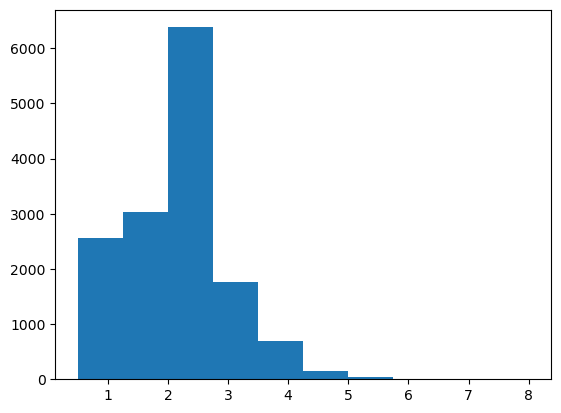

In [6]:
plt.hist(vg_df['number of bathrooms'])

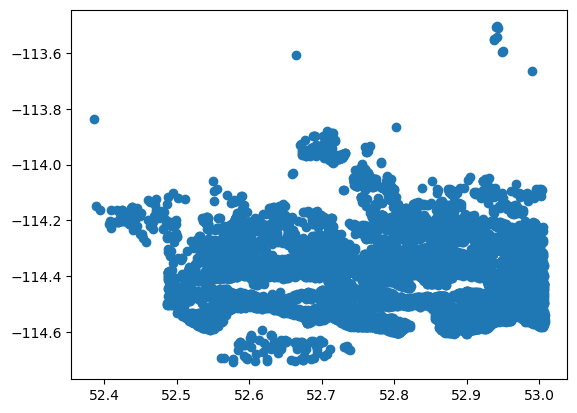

In [9]:
plt.scatter(vg_df.Lattitude,vg_df.Longitude)


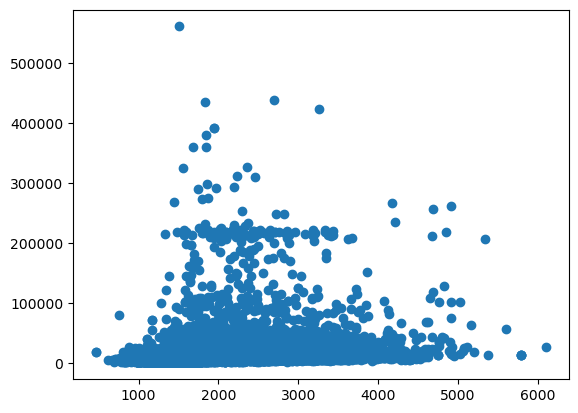

In [12]:
plt.scatter(vg_df.living_area_renov,vg_df.lot_area_renov)

In [13]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

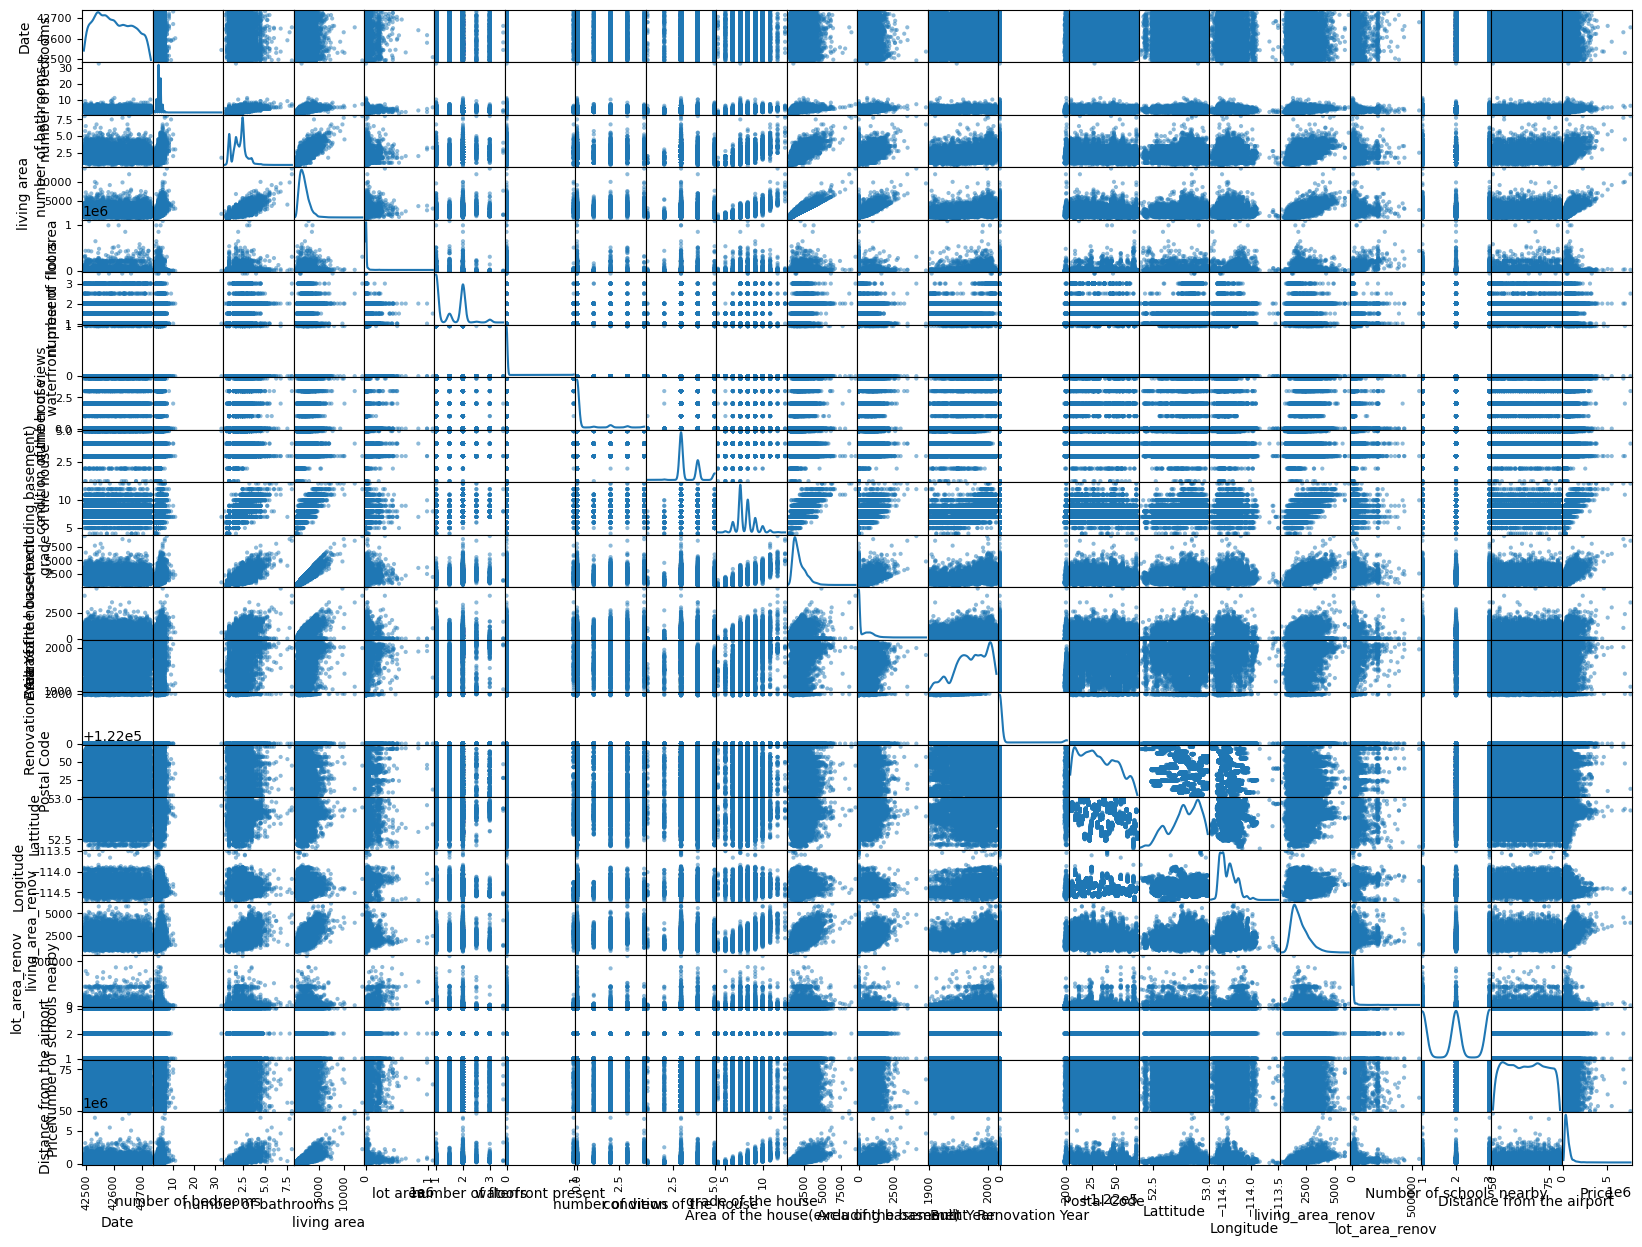

In [15]:
pd.plotting.scatter_matrix(vg_df.loc[:,"Date":"Price"],diagonal="kde",figsize=(20,15))
plt.show()

In [16]:
pd.DataFrame(vg_df.iloc[:,0:7].std().to_frame()).T

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors
0,6237.574799,67.347991,0.938719,0.769934,928.275721,37919.621304,0.540239


In [17]:
pd.DataFrame(vg_df.iloc[:,0:21].mean().to_frame()).T

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby
0,6.762821e+09,42604.538646,3.379343,2.129583,2098.262996,15093.281122,1.50236,0.007661,0.233105,3.430506,...,1801.783926,296.47907,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244


In [18]:
pd.DataFrame(vg_df.iloc[:,0:21].var().to_frame()).T
pd.DataFrame(vg_df.iloc[:,0:21].median().to_frame()).T

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby
0,6.762821e+09,42600.0,3.0,2.25,1930.0,7620.0,1.5,0.0,0.0,3.0,...,1580.0,0.0,1975.0,0.0,122032.0,52.8064,-114.421,1850.0,7620.0,2.0


In [22]:
print(vg_df['Price'].value_counts())
        
     

450000    114
350000    113
400000    104
375000    103
550000    102
         ... 
561600      1
856500      1
907687      1
307999      1
146000      1
Name: Price, Length: 2901, dtype: int64


In [23]:
vg_df.mode()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810020,42543.0,3.0,2.5,1400.0,5000.0,1.0,0.0,0.0,3.0,...,2014.0,0.0,122028.0,52.7745,-114.562,1440.0,5000.0,3.0,54.0,450000.0
1,6762810021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.8834,-114.552,NaN,NaN,NaN,NaN,NaN
2,6762810022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.8947,NaN,NaN,NaN,NaN,NaN,NaN
3,6762810023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.9146,NaN,NaN,NaN,NaN,NaN,NaN
4,6762810026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.9255,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762831611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14616,6762831612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14617,6762831613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14618,6762831615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
